**Run the following two cells before you begin.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%autosave 10

Autosaving every 10 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('/content/drive/My Drive/Technocolabs project/cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [ ]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [ ]:
dict1={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}
dict1

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [ ]:
from sklearn.model_selection import GridSearchCV
gdcv=GridSearchCV(rf,param_grid=dict1,verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [ ]:
gdcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [ ]:
result=pd.DataFrame(gdcv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.144996,0.002259,0.004560,0.000116,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819269,0.816925,0.824426,0.815284,0.818058,0.003590,11
1,0.693732,0.002426,0.016676,0.000968,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.815284,0.814346,0.820206,0.813408,0.815058,0.002788,15
2,1.372105,0.003224,0.031062,0.000490,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812705,0.813408,0.820441,0.810830,0.813605,0.003580,16
3,2.758375,0.006588,0.060337,0.000249,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811577,0.815518,0.814346,0.821378,0.813408,0.815246,0.003326,14
4,0.241015,0.001703,0.005309,0.000096,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.818565,0.819972,0.826301,0.819503,0.819746,0.003825,10
5,1.186252,0.007223,0.020712,0.000232,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815561,0.819034,0.819737,0.826067,0.820206,0.820121,0.003390,8
6,2.354236,0.008722,0.041047,0.002341,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.819972,0.819503,0.827004,0.820206,0.820496,0.003628,3
7,4.719254,0.036614,0.078293,0.000779,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815796,0.819972,0.819269,0.826770,0.820675,0.820496,0.003557,3
8,0.335103,0.003535,0.006455,0.000059,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.809702,0.815987,0.819972,0.824895,0.816221,0.817355,0.005008,12
9,1.633180,0.013059,0.026137,0.000525,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.815796,0.818565,0.819503,0.826301,0.819972,0.820027,0.003455,9


**Find the best hyperparameters from the cross-validation.**

In [ ]:
gdcv.best_params_

{'max_depth': 12, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [ ]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)
gds_res_mean_ts_rs=result['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


array([[0.8180584 , 0.81505804, 0.81360475, 0.81524559],
       [0.81974616, 0.82012116, 0.82049621, 0.82049621],
       [0.81735538, 0.82002739, 0.82026178, 0.82054312],
       [0.81721443, 0.82049614, 0.82049621, 0.82077745]])

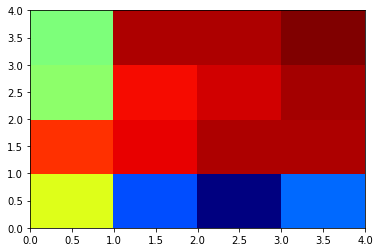

In [ ]:
# Set color map to `plt.cm.jet`
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

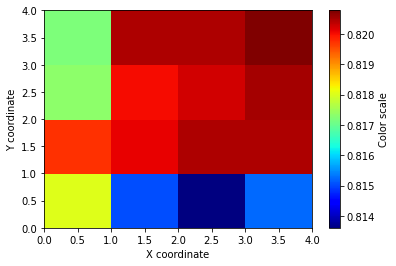

In [ ]:
# Visualize pcolormesh
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [ ]:
# Create a dataframe of the feature names and importance
df_features_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gdcv.best_estimator_.feature_importances_})
df_features_imp

,Features,Importance
0,LIMIT_BAL,0.059877
1,EDUCATION,0.012451
2,MARRIAGE,0.007819
3,AGE,0.042871
4,PAY_1,0.304592
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
7,BILL_AMT3,0.048639
8,BILL_AMT4,0.046171
9,BILL_AMT5,0.043062


In [ ]:
# Sort values by importance
df_features_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.304592
11,PAY_AMT1,0.060596
0,LIMIT_BAL,0.059877
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
12,PAY_AMT2,0.051697
7,BILL_AMT3,0.048639
13,PAY_AMT3,0.048254
8,BILL_AMT4,0.046171
10,BILL_AMT6,0.045718
